Laboratorio 1: Taller MLOPS.

Nombre: Matías Jesús Egaña Alfaro Rut: 20.457.413-8.  Asignatura: Taller Mlops Profesor: Humberto Farias Aroca.

Primero importamos librerias.

In [27]:
!pip install pandas
!pip install scikit-learn
!pip install xgboost
!pip install matplotlib
!pip install seaborn

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

DataSet de Resultados de diabeticos.

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/Sutanoy/Public-Regression-Datasets/main/diabetes.csv')

In [30]:
print(data)

      id  relwt  glufast  glutest  steady  insulin  group
0      1   0.81       80      356     124       55      3
1      3   0.94      105      319     143      105      3
2      5   1.00       90      323     240      143      3
3      7   0.91      100      350     221      119      3
4      9   0.99       97      379     142       98      3
..   ...    ...      ...      ...     ...      ...    ...
139  136   1.01      120      636     314      220      1
140  138   1.04      188      958     100      351      1
141  140   1.03      265     1263      83      413      1
142  142   0.91      180      923      77      150      1
143  144   1.11      328     1246     124      442      1

[144 rows x 7 columns]


In [64]:
X = data.drop('id', axis=1)
print("Eliminamos la columna id")
y = data['insulin']
print("Variable X (ID)")
print(X)
print("Variable Y (Insulina)")
print(y)

Eliminamos la columna id
Variable X (ID)
     relwt  glufast  glutest  steady  insulin  group
0     0.81       80      356     124       55      3
1     0.94      105      319     143      105      3
2     1.00       90      323     240      143      3
3     0.91      100      350     221      119      3
4     0.99       97      379     142       98      3
..     ...      ...      ...     ...      ...    ...
139   1.01      120      636     314      220      1
140   1.04      188      958     100      351      1
141   1.03      265     1263      83      413      1
142   0.91      180      923      77      150      1
143   1.11      328     1246     124      442      1

[144 rows x 6 columns]
Variable Y (Insulina)
0       55
1      105
2      143
3      119
4       98
      ... 
139    220
140    351
141    413
142    150
143    442
Name: insulin, Length: 144, dtype: int64


Creamos el Modelo de Regresión Lineal

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividimos los conjuntos para el entrenamiento y prueba, 80% de los datos se utilizan para entrenamiento y el 20% restante se utiliza para prueba.

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se normalización los datos para asegurarse de que todas las características tengan la misma escala

In [66]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

Entrenamos el Modelo de Regresión Lineal

In [53]:
y_pred_linear = linear_model.predict(X_test_scaled)

Se realizan las predicciones

In [54]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')

Linear Regression MSE: 2.7019302066825054e-27


Calculamos el Error Cuadratico.

In [55]:
variance = y.var()
data_range = y.max() - y.min()

print(f'Varianza de la variable objetivo: {variance}')
print(f'Rango de la variable objetivo: {data_range}')

Varianza de la variable objetivo: 11287.625437062938
Rango de la variable objetivo: 451


Calculamos Varianza y el Rango de la variable

In [56]:
print(f'Relación Linear Regression MSE/Varianza: {mse_linear/variance}')
print(f'Relación Linear Regression MSE/Rango: {mse_linear/data_range}')

Relación Linear Regression MSE/Varianza: 2.393710016112612e-31
Relación Linear Regression MSE/Rango: 5.990976068032163e-30


Y se compara el MSE con la varianza y el rango, para la regresión lineal

Modelo XGB Regressor

In [57]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Entrenamos el modelo XGBoost

In [58]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

Ahora realizamos las predicciones en el conjunto de prueba con XGBoost

In [59]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Regression MSE: {mse_xgb}')

XGBoost Regression MSE: 174.97994189271412


Y calculamos el error cuadrático medio (MSE) para XGBoost

In [60]:
print(f'Relación XGBoost Regression MSE/Varianza: {mse_xgb/variance}')
print(f'Relación XGBoost Regression MSE/Rango: {mse_xgb/data_range}')

Relación XGBoost Regression MSE/Varianza: 0.015501926677879228
Relación XGBoost Regression MSE/Rango: 0.3879821327998096


Comparamos el MSE con la varianza y el rango para XGBoost

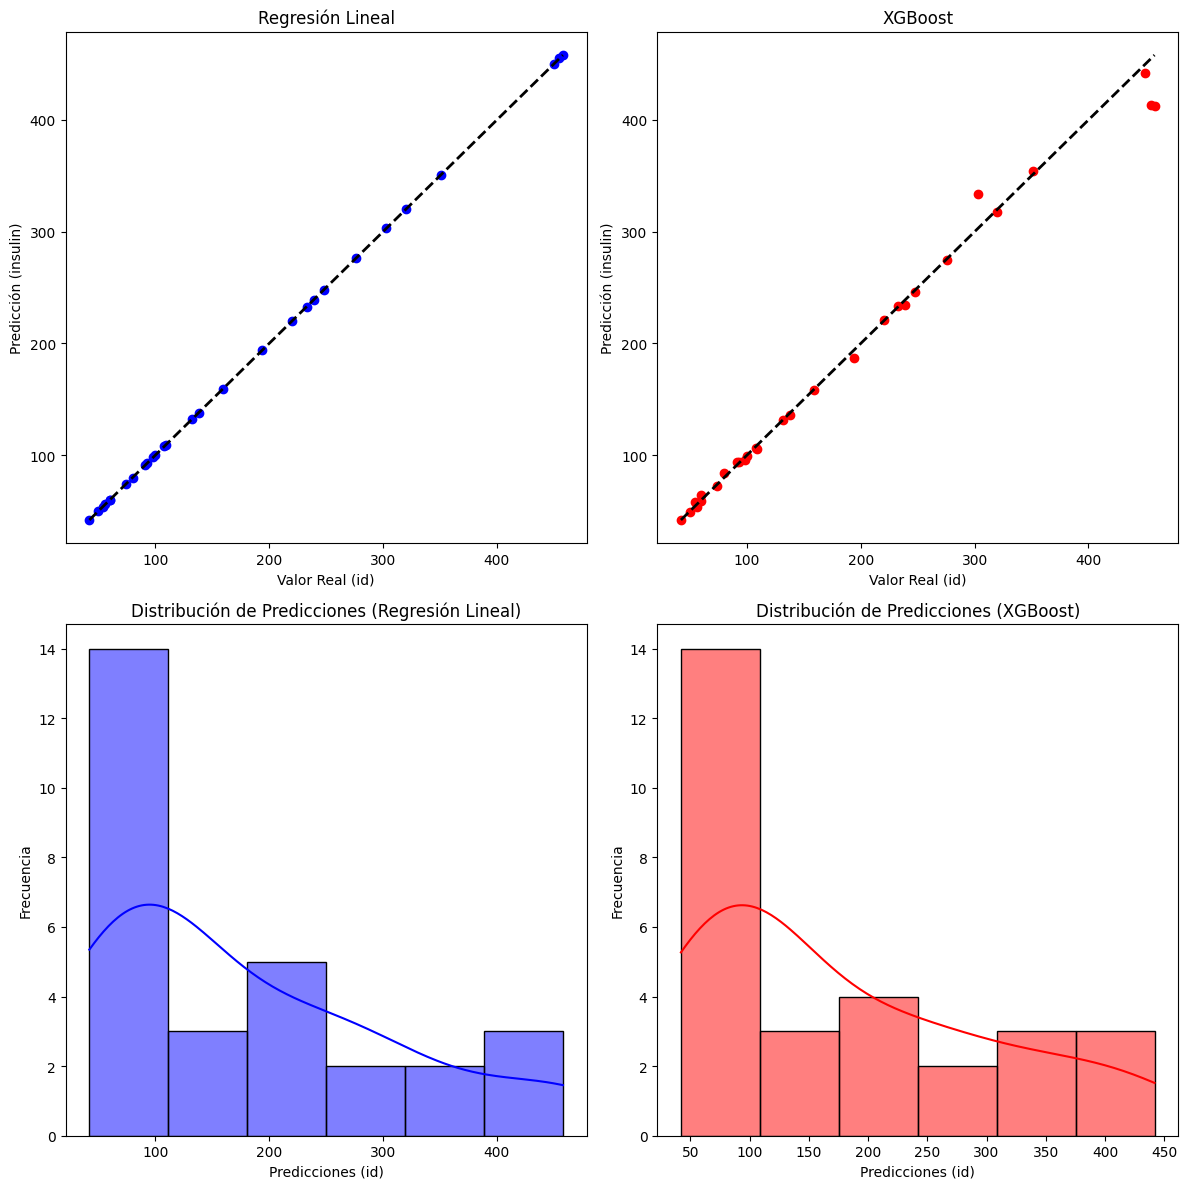

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].scatter(y_test, y_pred_linear, color='blue')
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0, 0].set_xlabel('Valor Real (id)')
axs[0, 0].set_ylabel('Predicción (insulin)')
axs[0, 0].set_title('Regresión Lineal')

axs[0, 1].scatter(y_test, y_pred_xgb, color='red')
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0, 1].set_xlabel('Valor Real (id)')
axs[0, 1].set_ylabel('Predicción (insulin)')
axs[0, 1].set_title('XGBoost')

sns.histplot(y_pred_linear, ax=axs[1, 0], color='blue', kde=True)
axs[1, 0].set_xlabel('Predicciones (id)')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].set_title('Distribución de Predicciones (Regresión Lineal)')

sns.histplot(y_pred_xgb, ax=axs[1, 1], color='red', kde=True)
axs[1, 1].set_xlabel('Predicciones (id)')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_title('Distribución de Predicciones (XGBoost)')

plt.tight_layout()
plt.show()